# Creating image Recognition Model

In [1]:
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [9]:
import tensorflow as tf

In [10]:
digit_mnist = keras.datasets.mnist

In [13]:
(x_train_full,y_train_full),(x_test,y_test) = digit_mnist.load_data()

In [16]:
import matplotlib.pyplot as plt

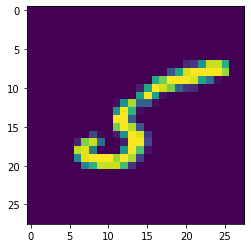

In [26]:
plt.imshow(x_train_full[11])

In [21]:
y_train_full[0]

5

In [22]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
x_train_n = x_train_full/255.0
x_test_n = x_test/255.0

In [24]:
x_train_n[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
len(x_train_n)

60000

In [27]:
x_train,x_valid = x_train_n[:3000],x_train_n[3000:]
y_train,y_valid = y_train_full[:3000],y_train_full[3000:]
x_test = x_test_n

In [28]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
import pandas as pd
import numpy as np

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
x_train.shape

(3000, 28, 28)

In [32]:
model = keras.models.Sequential()

In [34]:
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [37]:
import pydot

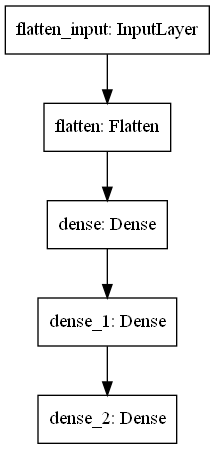

In [38]:
keras.utils.plot_model(model)

In [39]:
weights, biases = model.layers[1].get_weights()

In [40]:
weights.shape

(784, 200)

In [41]:
biases.shape

(200,)

In [42]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

In [43]:
model_history = model.fit(x_train,y_train, epochs = 60, validation_data=(x_valid,y_valid))

Epoch 1/60
94/94 [==============================] - 3s 29ms/step - loss: 2.1169 - accuracy: 0.3140 - val_loss: 1.8552 - val_accuracy: 0.5779
Epoch 2/60
94/94 [==============================] - 2s 22ms/step - loss: 1.5533 - accuracy: 0.6990 - val_loss: 1.3164 - val_accuracy: 0.7256
Epoch 3/60
94/94 [==============================] - 2s 16ms/step - loss: 1.0688 - accuracy: 0.7833 - val_loss: 0.9498 - val_accuracy: 0.7933
Epoch 4/60
94/94 [==============================] - 2s 17ms/step - loss: 0.7882 - accuracy: 0.8220 - val_loss: 0.7531 - val_accuracy: 0.8246
Epoch 5/60
94/94 [==============================] - 2s 21ms/step - loss: 0.6351 - accuracy: 0.8517 - val_loss: 0.6434 - val_accuracy: 0.8401
Epoch 6/60
94/94 [==============================] - 2s 18ms/step - loss: 0.5438 - accuracy: 0.8667 - val_loss: 0.5721 - val_accuracy: 0.8513
Epoch 7/60
94/94 [==============================] - 2s 18ms/step - loss: 0.4812 - accuracy: 0.8783 - val_loss: 0.5232 - val_accuracy: 0.8587
Epoch 8/60
94

Epoch 59/60
94/94 [==============================] - 2s 21ms/step - loss: 0.0856 - accuracy: 0.9860 - val_loss: 0.3207 - val_accuracy: 0.9064
Epoch 60/60
94/94 [==============================] - 2s 20ms/step - loss: 0.0843 - accuracy: 0.9857 - val_loss: 0.3180 - val_accuracy: 0.9078


In [47]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 94}

In [48]:
model_history.history

{'loss': [2.116884231567383,
  1.5533291101455688,
  1.0688132047653198,
  0.7882130742073059,
  0.6350640058517456,
  0.5438304543495178,
  0.4811927378177643,
  0.43718042969703674,
  0.40300607681274414,
  0.37758371233940125,
  0.3557310700416565,
  0.3359537422657013,
  0.3217465579509735,
  0.30789560079574585,
  0.29518285393714905,
  0.28454074263572693,
  0.27277490496635437,
  0.2643858790397644,
  0.25579336285591125,
  0.2475607842206955,
  0.23973535001277924,
  0.23177878558635712,
  0.22502067685127258,
  0.2185962051153183,
  0.2119409143924713,
  0.205619215965271,
  0.20054173469543457,
  0.19481170177459717,
  0.18901273608207703,
  0.1846969872713089,
  0.17967693507671356,
  0.17356982827186584,
  0.1693868786096573,
  0.16531558334827423,
  0.16047634184360504,
  0.15632082521915436,
  0.15199871361255646,
  0.1484886109828949,
  0.14466869831085205,
  0.1403600573539734,
  0.13729563355445862,
  0.1340591013431549,
  0.1305331140756607,
  0.12721604108810425,
  0

In [49]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.9126


[0.30316174030303955, 0.9125999808311462]

In [50]:
x_new = x_test[:3]

In [51]:
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.88, 0.06, 0.  , 0.01, 0.04, 0.  , 0.01, 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [53]:
y_prob_new = model.predict_classes(x_new)
y_prob_new

array([7, 2, 1], dtype=int64)

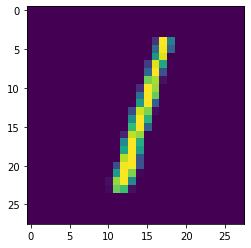

In [58]:
plt.imshow(x_test[2])